In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option('display.expand_frame_repr', False)

In [2]:
train = pd.read_csv("C:/Users/Cagan Deliktas/Desktop/VBO_Bootcamp/0lecture_code/P11_housePrice_ML1/HousePrice/data/train.csv", sep = ",", header = 0)
test = pd.read_csv("C:/Users/Cagan Deliktas/Desktop/VBO_Bootcamp/0lecture_code/P11_housePrice_ML1/HousePrice/data/test.csv", sep = ",", header = 0)

In [3]:
df = pd.concat([train, test], axis = 0, ignore_index=True)

In [4]:
df.shape

(2919, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


### a function to detect categorical variables from numerical variables

In [8]:
def grab_col_names(df, cat_th = 10, car_th = 20, numeric_limit = 30):

    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool",'O']]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtypes in ["int", "float", "int64","float64"]]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and str(df[col].dtypes) in ["category","object","bool", "'O'"]]


    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    #***************************************************************
    num_cols = [col for col in df.columns if df[col].dtypes in ["int","float","int64","float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    for car in cat_but_car:
        if df[car].nunique() > numeric_limit and df[car].nunique() != df.shape[0]:
                cat_but_car.remove(car)
                num_cols.append(car)

    print("Observations: {}\nVariables: {}\ncat_cols: {}\nnum_cols: {}\ncat_but_car: {}\nnum_but_cat: {}".format(df.shape[0],df.shape[1],len(cat_cols), len(num_cols),len(cat_but_car), len(num_but_cat)))

    return cat_cols, num_cols, cat_but_car

In [9]:
cat, num, catcar = grab_col_names(df, cat_th=15)

Observations: 2919
Variables: 81
cat_cols: 56
num_cols: 24
cat_but_car: 1
num_but_cat: 14


In [10]:
df[cat].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
OverallQual      10
OverallCond       9
BsmtFullBath      4
BsmtHalfBath      3
FullBath          5
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4


In [11]:
df[catcar].nunique()

Neighborhood    25
dtype: int64

In [12]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


#for col in cat:
    #cat_summary(df, col)

In [13]:
def num_summary(dataframe, numerical_col, plot=False):
    print(dataframe[numerical_col].describe().T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")

In [14]:
#for col in num:
#    num_summary(df, col, false)

### we can examine the categorical variables with respect to target variable

In [15]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [16]:
#for col in cat:
#    target_summary_with_cat(df,"SalePrice",col)

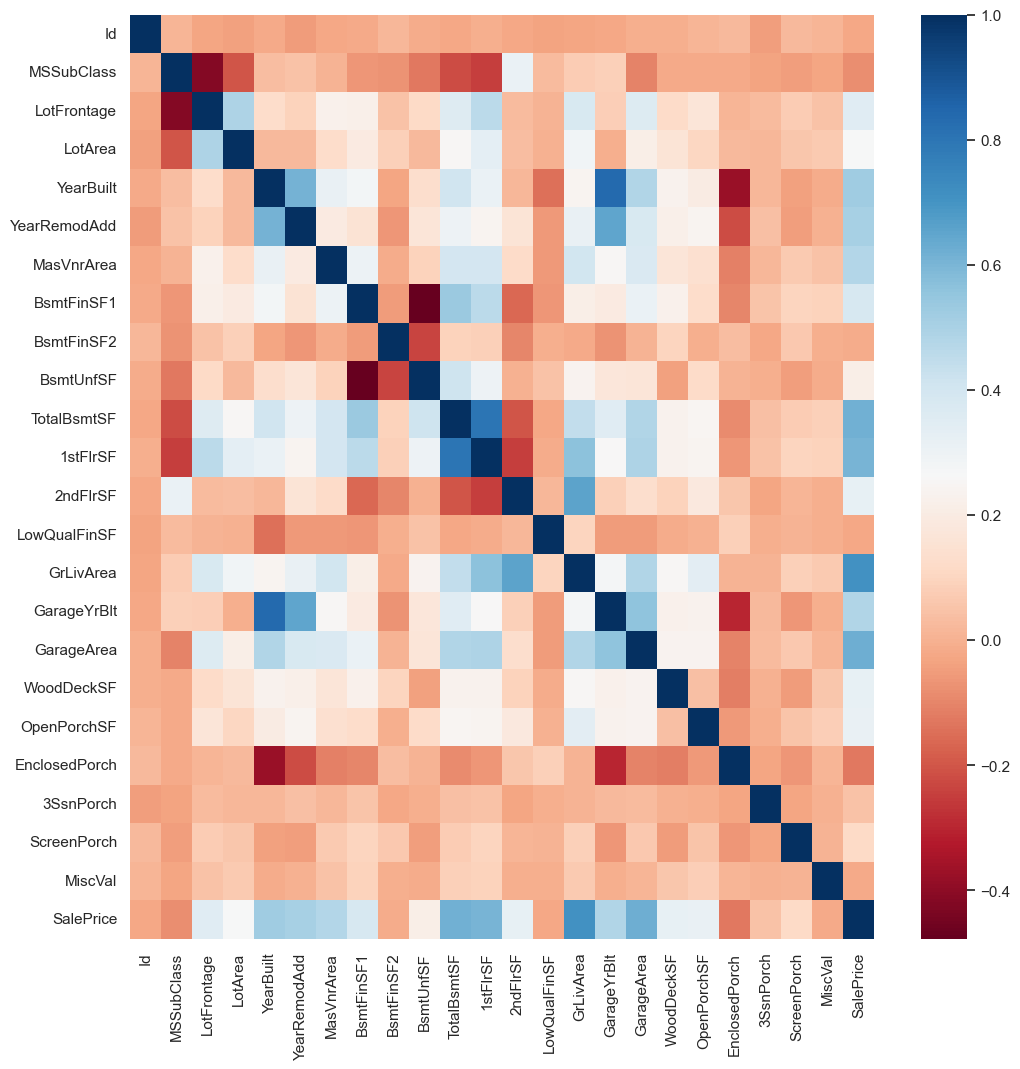

In [17]:
corr = df[num].corr()
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

### the first function calculates the floor and ceilings values for the outlier thresholds. the second function replaces outliers with their respective thresholds. the third functions checks whether there are outliers in the variables.

In [18]:
def outlier_thresholds(dataframe, variable):
    import math as mt
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return mt.floor(low_limit), mt.floor(up_limit)

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def check_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)

    if dataframe.loc[(dataframe[variable] < low_limit), variable].any():
        print("Var Name:", variable)
        print("Floor limit:", low_limit)
        print(variable, "- Yes, this variable has outliers lower than floor limit.")
        print("Outliers: ", dataframe.loc[(dataframe[variable] < low_limit), variable].index)
        print("************************************************************************************")
    elif dataframe.loc[(dataframe[variable] > up_limit), variable].any():
        print("Var Name:", variable)
        print("Ceiling limit:", up_limit)
        print(variable, "-- Yes, this variable has outliers higher than ceiling limit.")
        print("Outliers: ", dataframe.loc[(dataframe[variable] > up_limit), variable].index)
        print("************************************************************************************")
    else:
        print("Var Name:", variable)
        print("There are no outliers in this variable.")
        print("************************************************************************************")

In [19]:
for col in num:
    if col != "SalePrice":
      print(col, check_outliers(df, col))

Var Name: Id
There are no outliers in this variable.
************************************************************************************
Id None
Var Name: MSSubClass
There are no outliers in this variable.
************************************************************************************
MSSubClass None
Var Name: LotFrontage
Ceiling limit: 307
LotFrontage -- Yes, this variable has outliers higher than ceiling limit.
Outliers:  Index([934, 1298], dtype='int64')
************************************************************************************
LotFrontage None
Var Name: LotArea
Ceiling limit: 80076
LotArea -- Yes, this variable has outliers higher than ceiling limit.
Outliers:  Index([249, 313, 335, 706], dtype='int64')
************************************************************************************
LotArea None
Var Name: YearBuilt
There are no outliers in this variable.
************************************************************************************
YearBuilt None
Var Name:

### replacing the outliers with the threshold values. 

In [20]:
for col in num:
    if col != "SalePrice":
        replace_with_thresholds(df,col)

In [21]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

              n_miss  ratio
PoolQC          2909  99.66
MiscFeature     2814  96.40
Alley           2721  93.22
Fence           2348  80.44
MasVnrType      1766  60.50
SalePrice       1459  49.98
FireplaceQu     1420  48.65
LotFrontage      486  16.65
GarageCond       159   5.45
GarageYrBlt      159   5.45
GarageFinish     159   5.45
GarageQual       159   5.45
GarageType       157   5.38
BsmtExposure      82   2.81
BsmtCond          82   2.81
BsmtQual          81   2.77
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrArea        23   0.79
MSZoning           4   0.14
Functional         2   0.07
BsmtHalfBath       2   0.07
BsmtFullBath       2   0.07
Utilities          2   0.07
KitchenQual        1   0.03
TotalBsmtSF        1   0.03
BsmtUnfSF          1   0.03
GarageCars         1   0.03
GarageArea         1   0.03
BsmtFinSF2         1   0.03
BsmtFinSF1         1   0.03
Exterior2nd        1   0.03
Exterior1st        1   0.03
SaleType           1   0.03
Electrical         1

In [22]:
num.remove("SalePrice")

In [23]:
df[num] = df[num].apply(lambda x: x.fillna(x.median()), axis=0)
df[cat] = df[cat].apply(lambda x: x.fillna(x.mode()[0]), axis=0)
df[catcar] = df[catcar].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

In [24]:
(df.isnull().sum() > 0).any()

True

In [25]:
missing_values_table(df)

           n_miss  ratio
SalePrice    1459  49.98


In [26]:
num.append("SalePrice")

In [27]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

#rare_analyser(df, "SalePrice", cat)

In [28]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if col in cat
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [29]:
df = rare_encoder(df,0.01)

### creating a few new variables

In [30]:
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
df["NEW_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]
df["NEW_Garage*GrLiv"] = (df["GarageArea"] * df["GrLivArea"])

### removing highly correlated variables

In [31]:
def remove_collinear(dataframe, response, threshold = 0.7):
    import numpy as np

    target_col = dataframe[response]

    dataframe = dataframe.drop(response, axis = 1)

    # Create correlation matrix
    corr_matrix = dataframe.corr().abs()

    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    print("upper matrix: \n")
    
    display(upper)

    to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

    dataframe = dataframe.drop(to_drop, axis=1)

    dataframe = pd.concat([dataframe, target_col], axis=1)

    print("columns removed: ", to_drop)

    return dataframe

In [32]:
df_num = remove_collinear(df[num], "SalePrice")

upper matrix: 



,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
Id,NaN,0.008931,0.024686,0.028788,0.016581,0.050438,0.026737,0.016959,0.018170,0.014509,0.024997,0.008865,0.022252,0.045077,0.029046,0.027105,0.008847,0.007726,0.009771,0.019758,0.044487,0.022208,0.008504
MSSubClass,NaN,NaN,0.390243,0.275138,0.034409,0.043315,0.006309,0.065077,0.072431,0.125913,0.221068,0.248855,0.309309,0.031898,0.071677,0.084901,0.103389,0.017987,0.016070,0.021058,0.036878,0.049181,0.027110
LotFrontage,NaN,NaN,NaN,0.452974,0.115670,0.086022,0.200592,0.190119,0.040474,0.107264,0.326822,0.423237,0.023237,0.007000,0.348167,0.069869,0.338315,0.105078,0.152147,0.008249,0.022198,0.069559,0.018865
LotArea,NaN,NaN,NaN,NaN,0.036886,0.034102,0.161349,0.222429,0.075658,0.040934,0.305316,0.413529,0.047862,0.000700,0.361511,0.000964,0.281105,0.193584,0.145575,0.031295,0.023794,0.078095,0.070114
YearBuilt,NaN,NaN,NaN,NaN,NaN,0.612235,0.307520,0.281392,0.027507,0.130517,0.410045,0.311064,0.017588,0.150831,0.242666,0.792384,0.480507,0.230397,0.199120,0.384097,0.015573,0.041046,0.040105
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,0.191668,0.152560,0.061959,0.165217,0.299050,0.242408,0.158985,0.057704,0.316972,0.629482,0.376741,0.219684,0.242824,0.225864,0.039275,0.046878,0.026013
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300316,0.014580,0.087991,0.393840,0.392040,0.119377,0.061316,0.400088,0.242444,0.370945,0.167640,0.141192,0.112249,0.015281,0.066392,0.005594
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055318,0.482654,0.527941,0.452259,0.165812,0.067465,0.204440,0.190773,0.308849,0.225274,0.121559,0.101008,0.056060,0.098295,0.043593
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238215,0.090028,0.084542,0.097654,0.002598,0.017747,0.068598,0.003225,0.099054,0.005768,0.034146,0.023555,0.063329,0.000015
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.414536,0.296857,0.000318,0.034429,0.234017,0.167524,0.164435,0.038930,0.119863,0.002773,0.010790,0.049136,0.045157


columns removed:  ['1stFlrSF', 'GarageYrBlt']


In [33]:
num.remove('1stFlrSF')
num.remove('GarageYrBlt')

In [34]:
df = pd.concat([df_num, df[cat], df[catcar]], axis = 1)

In [35]:
df.shape

(2919, 79)

In [36]:
binary_cols = [col for col in cat if df[col].nunique() == 2]
ohe_cols = [col for col in cat if col not in binary_cols]

In [37]:
for x in binary_cols:
    df[x] = LabelEncoder().fit_transform(df[x])

In [38]:
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)
df = pd.get_dummies(df, columns=["Neighborhood"], drop_first=True)

In [39]:
df = df.drop(["Id"], axis = 1)
X = df.loc[:, [col for col in df.columns if col != "SalePrice"]]
y = df.loc[:, ["SalePrice"]]

In [40]:
df.SalePrice.isnull().sum()

1459

In [41]:
X_test = df.loc[df.SalePrice.isnull(), df.columns != "SalePrice"]
X_train = df.loc[df.SalePrice.notnull(), df.columns != "SalePrice"]

In [42]:
X_columns = X_test.columns

In [43]:
y_train = df.loc[y.notnull().values, "SalePrice"]

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [45]:
num.remove("Id")
num.remove("SalePrice")
X_train[num] = sc_X.fit_transform(X_train[num])
y_train = sc_y.fit_transform(y_train.values.reshape(-1, 1))

In [46]:
X_test[num] = sc_X.transform(X_test[num])

In [47]:
y_train = y_train.flatten()

In [48]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror'))]

In [49]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 138331500007.4669 (LR) 
RMSE: 0.4054 (Ridge) 
RMSE: 0.9983 (Lasso) 
RMSE: 0.879 (ElasticNet) 
RMSE: 0.4823 (KNN) 
RMSE: 0.5739 (CART) 
RMSE: 0.3854 (RF) 
RMSE: 0.3914 (SVR) 
RMSE: 0.3658 (XGBoost) 


In [50]:
XGModel = XGBRegressor()
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]}

lgbm_gs_best = GridSearchCV(XGModel,
                            lgbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

lgbm_gs_best.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


{'learning_rate': 0.1, 'n_estimators': 500}

In [51]:
final_model = XGModel.set_params(**lgbm_gs_best.best_params_)

In [52]:
final_model.fit(X_train, y_train)
y_pred = sc_y.inverse_transform(final_model.predict(X_test).reshape(-1, 1))

In [53]:
y_pred

array([[125305.305],
       [153400.55 ],
       [183192.88 ],
       ...,
       [153262.33 ],
       [107044.375],
       [261243.48 ]], dtype=float32)

In [54]:
x_test = pd.DataFrame(X_test, columns = X_columns)

In [55]:
X_test["Predictions"] = y_pred

In [56]:
X_test[num] = sc_X.inverse_transform(X_test[num])


X_test.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,Street,Alley,Utilities,Condition2,RoofMatl,Heating,CentralAir,PoolQC,MiscFeature,PoolArea,MSZoning_RL,MSZoning_RM,MSZoning_Rare,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Rare,GarageQual_TA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_Rare,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,OverallCond_Rare,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_Rare,BsmtHalfBath_1.0,BsmtHalfBath_Rare,FullBath_2,FullBath_3,FullBath_Rare,HalfBath_1,HalfBath_Rare,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_Rare,KitchenAbvGr_2,KitchenAbvGr_Rare,TotRmsAbvGrd_11,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_Rare,Fireplaces_1,Fireplaces_2,Fireplaces_Rare,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_Rare,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Predictions
1460,20.0,80.0,11622.0,1961.0,1961.0,-1.421085e-14,468.0,144.0,270.0,882.0,0.0,0.0,896.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0,0,0,0,0,0,1,0,1,0,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,

In [57]:
X_test["Predictions"].head()

1460    125305.304688
1461    153400.546875
1462    183192.875000
1463    200137.546875
1464    194679.578125
Name: Predictions, dtype: float32